In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df=pd.read_csv('Churn_Modelling.csv')

In [75]:
df.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9009,9010,15729087,Suttor,751,Germany,Male,54,9,156367.6,2,0,1,116179.92,0
4366,4367,15669060,Woolnough,662,France,Male,74,6,0.0,2,1,0,123583.85,0


In [76]:
df1=df.drop(columns=['CustomerId','Surname'],axis=1)
df1.sample(2)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4277,4278,775,Germany,Male,51,2,123783.25,1,1,1,134901.57,0
6509,6510,738,Germany,Female,40,1,115409.18,2,0,0,180456.80,0


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [80]:
for i in df1:
    print(f'{i}: {df1[i].unique()}') 

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 6

In [81]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [82]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [83]:
df2=df1.replace({'Gender':{'Male':1,'Female':0}})
df2.sample(2)

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4329,4330,748,Spain,1,60,3,0.00,2,1,1,78194.37,0
609,610,698,Germany,0,51,2,111018.98,1,1,0,86410.28,0


In [84]:
df3=pd.get_dummies(df2)
df3.sample(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5494,5495,383,0,48,8,95808.19,1,0,0,137702.01,1,0,0,1
1250,1251,548,1,32,5,175214.71,1,1,1,155165.61,0,0,1,0


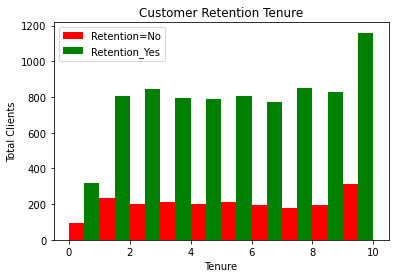

In [85]:
Tenure_Exited_Yes=df3[df3.Exited==1].Tenure
Tenure_Exited_No=df3[df3.Exited==0].Tenure

plt.xlabel('Tenure')
plt.ylabel('Total Clients')
plt.title("Customer Retention Tenure")

plt.hist([Tenure_Exited_Yes,Tenure_Exited_No],rwidth=1,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

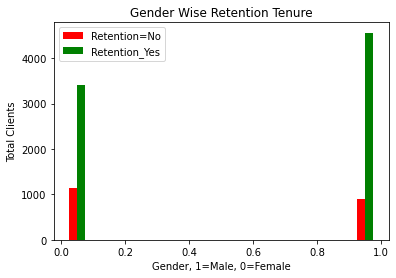

In [86]:
Gender_Exited_Yes=df3[df3.Exited==1].Gender
Gender_Exited_No=df3[df3.Exited==0].Gender

plt.xlabel('Gender, 1=Male, 0=Female')
plt.ylabel('Total Clients')
plt.title("Gender Wise Retention Tenure")

plt.hist([Gender_Exited_Yes,Gender_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

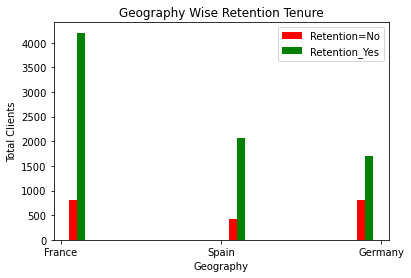

In [87]:
Geo_Exited_Yes=df2[df2.Exited==1].Geography
Geo_Exited_No=df2[df2.Exited==0].Geography

plt.xlabel('Geography')
plt.ylabel('Total Clients')
plt.title("Geography Wise Retention Tenure")

plt.hist([Geo_Exited_Yes,Geo_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

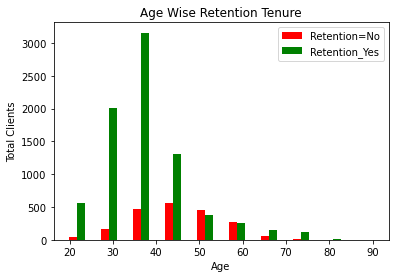

In [88]:
Age_Exited_Yes=df3[df3.Exited==1].Age
Age_Exited_No=df3[df3.Exited==0].Age

plt.xlabel('Age')
plt.ylabel('Total Clients')
plt.title("Age Wise Retention Tenure")

plt.hist([Age_Exited_Yes,Age_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

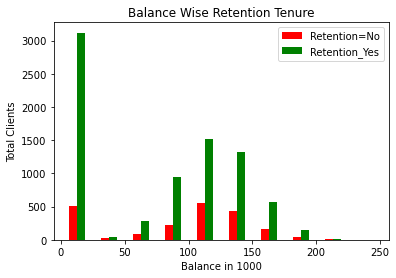

In [89]:
Balance_Exited_Yes=df3[df3.Exited==1].Balance/1000
Balance_Exited_No=df3[df3.Exited==0].Balance/1000

plt.xlabel('Balance in 1000')
plt.ylabel('Total Clients')
plt.title("Balance Wise Retention Tenure")

plt.hist([Balance_Exited_Yes,Balance_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

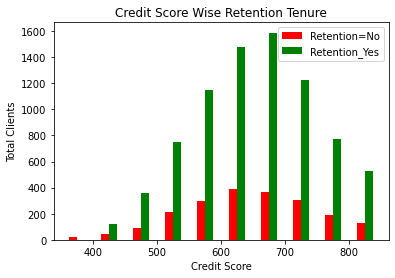

In [90]:
CRS_Exited_Yes=df3[df3.Exited==1].CreditScore
CRS_Exited_No=df3[df3.Exited==0].CreditScore

plt.xlabel('Credit Score')
plt.ylabel('Total Clients')
plt.title("Credit Score Wise Retention Tenure")

plt.hist([CRS_Exited_Yes,CRS_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

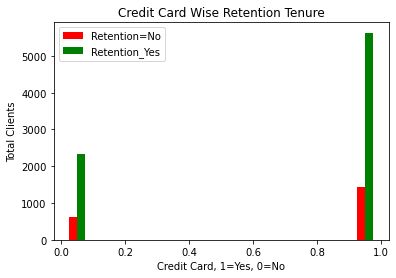

In [91]:
CrCard_Exited_Yes=df3[df3.Exited==1].HasCrCard
CrCard_Exited_No=df3[df3.Exited==0].HasCrCard

plt.xlabel('Credit Card, 1=Yes, 0=No')
plt.ylabel('Total Clients')
plt.title("Credit Card Wise Retention Tenure")

plt.hist([CrCard_Exited_Yes,CrCard_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

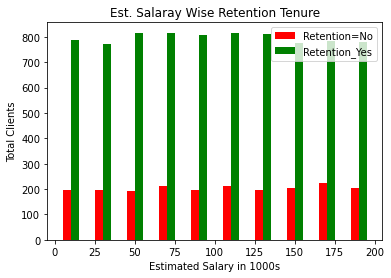

In [92]:
EstSal_Exited_Yes=df3[df3.Exited==1].EstimatedSalary/1000
EstSal_Exited_No=df3[df3.Exited==0].EstimatedSalary/1000

plt.xlabel('Estimated Salary in 1000s')
plt.ylabel('Total Clients')
plt.title("Est. Salaray Wise Retention Tenure")

plt.hist([EstSal_Exited_Yes,EstSal_Exited_No],rwidth=0.5,color=['red','green'],label=['Retention=No','Retention_Yes'])
plt.legend()

In [93]:
len(df3.columns)

14

In [94]:
df3.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [95]:
"We need to check if the HIGH income  group is leaving the bank.We are considering MEAN-1 SD is low income group"

df3[df3.EstimatedSalary<(100090-57510)].shape

(2085, 14)

In [96]:
(df3[df3.EstimatedSalary<(100090-57510)].Exited==1).sum()

420

In [97]:
(df3[df3.EstimatedSalary<(100090-57510)].Exited==0).sum()

1665

In [98]:
"We need to check if the HIGH income  group is leaving the bank.We are considering MEAN+1 SD is high income group"

df3[df3.EstimatedSalary>(100090+57510)].shape

(2124, 14)

In [99]:
(df3[df3.EstimatedSalary>(100090+57510)].Exited==1).sum()

452

In [100]:
(df3[df3.EstimatedSalary>(100090+57510)].Exited==0).sum()

1672

In [101]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [102]:
(df3[df3.CreditScore<584].Exited==1).sum()

548

In [103]:
(df3[df3.CreditScore<584].Exited==0).sum()

1943

In [104]:
cols_to_scale = ['Balance','EstimatedSalary','CreditScore','Age']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [105]:
df3.sample(2)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1492,1493,0.770,1,0.432432,9,0.0,1,0,0,0.833408,1,0,0,1
2104,2105,0.836,1,0.324324,5,0.0,3,0,0,0.303403,0,1,0,0


In [106]:
X = df3.drop('Exited',axis='columns')
y = df3['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [114]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


def find_best_model_Gridsearchcv (X,y):
    
    algo={
        'Gaussian Naive Bayes': {
            'model': GaussianNB(),
            'params': {
                
            }
        },
    
        
           'Logistic Regression': {
            'model': LogisticRegression(),
            'params': {
                'max_iter' : [2000]

            }
        },
        
        'Decision Tree Classifier':{
            'model': tree.DecisionTreeClassifier(),
            'params': {
                'splitter': ['best','random']
            }
        },
      
        'K Nearest Neighbor Classifier':{
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors' : [3,5],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]
            }
       },
        
        'Random Forest Classifier':{
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100]
            
            }
        },
        
      'SVC':{
            'model': SVC(probability=True),
            'params':{

            }
        },  
        
        'XGBClassfier':{
            'model': XGBClassifier(),
            'params':{
                'n_estimators':[50]
                
            }
        },
        
    
        
    }
    
    scores=[]

    for algo_name, config in algo.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_Gridsearchcv (X,y)

,model,best_score
0,Gaussian Naive Bayes,0.8201
1,Logistic Regression,0.8128
2,Decision Tree Classifier,0.7990
3,K Nearest Neighbor Classifier,0.7691
4,Random Forest Classifier,0.8645
5,SVC,0.8004
6,XGBClassfier,0.8589


In [122]:
model=XGBClassifier(random_state =1)
model.fit(X_train,y_train)
predict=model.predict(X_test)
predict[:5]

array([0, 0, 1, 0, 0])

In [123]:
y_pred = []
for element in predict :
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [124]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))            

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1577
           1       0.71      0.55      0.62       423

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

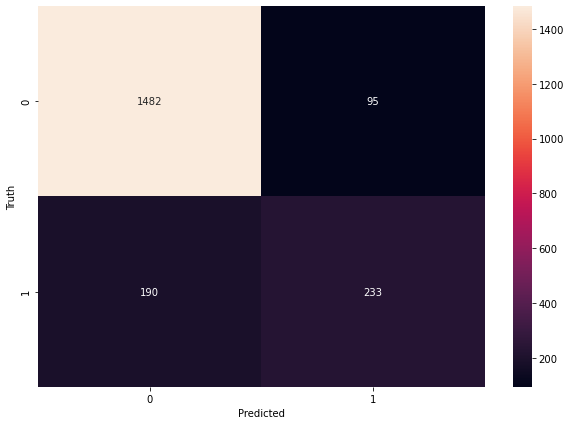

In [129]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')